In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BDAS').getOrCreate()

In [2]:
Total_Clean_data = spark.read.csv('Total_Clean_data.csv', inferSchema=True, header=True)
Total_Clean_data.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)
 |-- Bin_Global_Sales: double (nullable = true)



In [12]:
Total_Clean_data.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16285 entries, 0 to 16284
Data columns (total 12 columns):
Rank                16285 non-null int64
Platform            16285 non-null object
Year                16285 non-null int64
Genre               16285 non-null object
Publisher           16285 non-null object
Name                16285 non-null object
NA_Sales            16285 non-null float64
EU_Sales            16285 non-null float64
JP_Sales            16285 non-null float64
Other_Sales         16285 non-null float64
Global_Sales        16285 non-null float64
Bin_Global_Sales    16285 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


In [4]:
Total_Clean_data.toPandas().head(15)

,Rank,Platform,Year,Genre,Publisher,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Bin_Global_Sales
0,1,Wii,2006,Sports,Nintendo,Wii Sports,41.49,29.02,3.77,8.46,82.74,16.0
1,2,NES,1985,Platform,Nintendo,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24,8.0
2,3,Wii,2008,Racing,Nintendo,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82,7.0
3,4,Wii,2009,Sports,Nintendo,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00,6.0
4,5,GB,1996,Role-Playing,Nintendo,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37,6.0
5,6,GB,1989,Puzzle,Nintendo,Tetris,23.20,2.26,4.22,0.58,30.26,6.0
6,7,DS,2006,Platform,Nintendo,New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01,6.0
7,8,Wii,2006,Misc,Nintendo,Wii Play,14.03,9.20,2.93,2.85,29.02,5.0
8,9,Wii,2009,Platform,Nintendo,New Super Mario Bros. Wii,14.59,7.06,4.70,2.26,28.62,5.0
9,10,NES,1984,Shooter,Nintendo,Duck Hunt,26.93,0.63,0.28,0.47,28.31,5.0


In [16]:
Total_Clean_data = Total_Clean_data.toPandas()

In [14]:
Total_Clean_data = spark.createDataFrame(Total_Clean_data)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

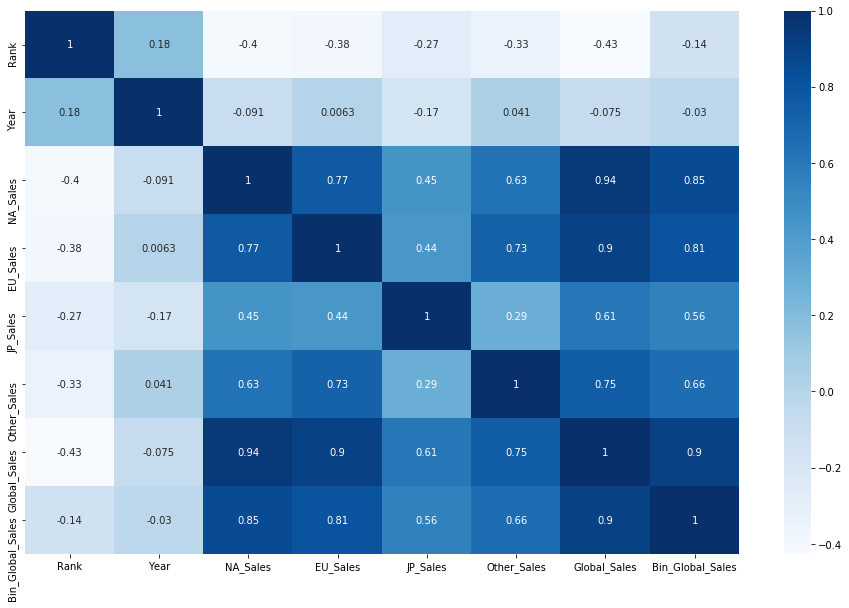

In [18]:
fig = plt.figure(figsize = (16,10))
sns.heatmap(Total_Clean_data.corr(),annot = True,cmap = "Blues")

In [4]:
Total_Clean_data.select("Global_Sales", "Name").show(20)

+------------+--------------------+
|Global_Sales|                Name|
+------------+--------------------+
|       82.74|          Wii Sports|
|       40.24|   Super Mario Bros.|
|       35.82|      Mario Kart Wii|
|        33.0|   Wii Sports Resort|
|       31.37|Pokemon Red/Pokem...|
|       30.26|              Tetris|
|       30.01|New Super Mario B...|
|       29.02|            Wii Play|
|       28.62|New Super Mario B...|
|       28.31|           Duck Hunt|
|       24.76|          Nintendogs|
|       23.42|       Mario Kart DS|
|        23.1|Pokemon Gold/Poke...|
|       22.72|             Wii Fit|
|        22.0|        Wii Fit Plus|
|       21.82|  Kinect Adventures!|
|        21.4|  Grand Theft Auto V|
|       20.81|Grand Theft Auto:...|
|       20.61|   Super Mario World|
|       20.22|Brain Age: Train ...|
+------------+--------------------+
only showing top 20 rows



In [20]:
Total_Clean_data.select("Year","Global_Sales","NA_Sales").groupby("Year").sum().show()

+----+---------+------------------+------------------+
|Year|sum(Year)| sum(Global_Sales)|     sum(NA_Sales)|
+----+---------+------------------+------------------+
|1990|    31840| 49.38999999999999|             25.46|
|2003|  1552325| 357.8499999999989|193.59000000000066|
|2007|  2408400| 609.8399999999934| 311.1799999999983|
|2015|  1237210|264.43999999999795|102.81999999999992|
|2006|  2022048| 521.0399999999917|263.11999999999887|
|2013|  1099098|368.10999999999865| 154.7700000000001|
|1988|    29820|             47.22|23.869999999999997|
|1997|   577133|200.98000000000013| 94.75000000000007|
|1994|   241274| 79.17000000000003|28.150000000000002|
|2014|  1168120| 337.0299999999985| 131.9700000000002|
|2004|  1490976| 414.0099999999987|218.80000000000032|
|1991|    81631|32.230000000000004|             12.76|
|1982|    71352|28.859999999999996|26.920000000000005|
|1996|   524948|199.14999999999995| 86.75999999999999|
|1989|    33813|             73.45|             45.15|
|1998|   7

In [48]:
Total_Clean_data.registerTempTable('Total_Clean_data')
spark.sql("SELECT Year, ROUND(SUM(Global_Sales),2) AS TT_GlobalSales,\
                        ROUND(SUM(NA_Sales),2) AS TT_NASales,\
                        ROUND(SUM(JP_Sales),2) AS TT_JPSales,\
                        ROUND(SUM(EU_Sales),2) AS TT_EUSales,\
                        ROUND(SUM(Other_Sales),2) AS TT_OtherSales\
                        FROM Total_Clean_data Group by Year Order by Year").show(50)

+----+--------------+----------+----------+----------+-------------+
|Year|TT_GlobalSales|TT_NASales|TT_JPSales|TT_EUSales|TT_OtherSales|
+----+--------------+----------+----------+----------+-------------+
|1980|         11.38|     10.59|       0.0|      0.67|         0.12|
|1981|         35.77|      33.4|       0.0|      1.96|         0.32|
|1982|         28.86|     26.92|       0.0|      1.65|         0.31|
|1983|         16.79|      7.76|       8.1|       0.8|         0.14|
|1984|         50.36|     33.28|     14.27|       2.1|          0.7|
|1985|         53.94|     33.73|     14.56|      4.74|         0.92|
|1986|         37.07|      12.5|     19.81|      2.84|         1.93|
|1987|         21.74|      8.46|     11.63|      1.41|          0.2|
|1988|         47.22|     23.87|     15.76|      6.59|         0.99|
|1989|         73.45|     45.15|     18.36|      8.44|          1.5|
|1990|         49.39|     25.46|     14.88|      7.63|          1.4|
|1991|         32.23|     12.76|  

In [3]:
Total_Clean_data = Total_Clean_data.toPandas()

Text(0,0.5,'/million')

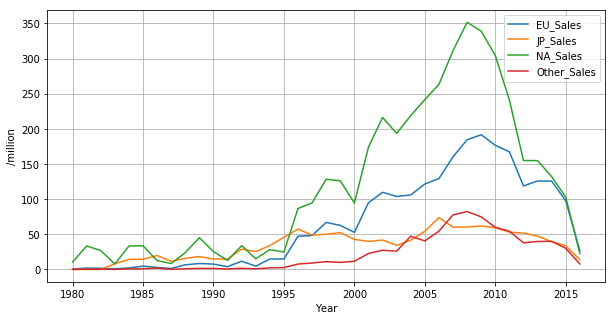

In [6]:
Total_Clean_data.pivot_table(index ='Year',\
                             values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],\
                             aggfunc='sum')\
                            .plot(figsize=(10,5))
plt.grid()
plt.ylabel('/million')